# Data Exploration and Preprocessing

# Oxidation Dataset

In [78]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [79]:
# Oxidation Process Data

df1_oxid = pd.read_csv('Oxid_000.csv')

In [80]:
df1_oxid.head(3)

Ox_Chamber    process type    Temp_OXid Vapor    ppm  Pressure  Oxid_time  \
0           1  Oxidation  dry  1138.979159    O2  32.80     0.200         62   
1           1  Oxidation  dry  1218.184551    O2  31.86     0.194        137   
2           1  Oxidation  dry  1062.467808    O2  39.51     0.217        128   

   thickness    No_Die  Lot_Num  Wafer_Num               Datetime  
0    699.443  NOLSM111        1          1  17-02-2019 PM 9:04:30  
1    696.792  NOLSM212        1          2  17-02-2019 PM 9:04:30  
2    705.471  NOLSM313        1          3  17-02-2019 PM 9:04:30

In [81]:
# No null values / type check

df1_oxid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ox_Chamber  852 non-null    int64  
 1   process     852 non-null    object 
 2   type        852 non-null    object 
 3   Temp_OXid   852 non-null    float64
 4   Vapor       852 non-null    object 
 5   ppm         852 non-null    float64
 6   Pressure    852 non-null    float64
 7   Oxid_time   852 non-null    int64  
 8   thickness   852 non-null    float64
 9   No_Die      852 non-null    object 
 10  Lot_Num     852 non-null    int64  
 11  Wafer_Num   852 non-null    int64  
 12  Datetime    852 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 86.7+ KB


In [82]:
# Oxid_time (Oxidation time's minimum value is negative (-6) which must be handled)
# Maximum Temp_OXid (Oxidation Temperature) is too high (1339.47)

df1_oxid.describe()

Ox_Chamber    Temp_OXid         ppm    Pressure   Oxid_time  \
count   852.00000   852.000000  852.000000  852.000000  852.000000   
mean      2.00000  1064.415784   33.202242    0.211374  123.201878   
std       0.81265   149.550147    8.494070    0.009067   76.285130   
min       1.00000   862.011276   21.070000    0.180000   -6.000000   
25%       1.00000   874.756813   22.450000    0.205000   52.000000   
50%       2.00000  1069.240209   33.420000    0.213000  116.000000   
75%       3.00000  1189.172249   40.452500    0.217000  217.000000   
max       3.00000  1339.476675   49.910000    0.229000  291.000000   

        thickness     Lot_Num   Wafer_Num  
count  852.000000  852.000000  852.000000  
mean   710.926810   16.281690   13.894366  
std      8.082856    9.116841    7.785951  
min    681.435000    1.000000    1.000000  
25%    706.313000    8.000000    7.000000  
50%    711.590500   16.000000   14.000000  
75%    715.595000   24.000000   21.000000  
max    737.402000   32.000000   27.000000

In [83]:
cond1 = (df1_oxid['Oxid_time'] < 0)
df1_oxid.loc[cond1, 'Oxid_time'] = np.nan

In [84]:
# Outlier Removal Method using IQR

Q1 = df1_oxid['Oxid_time'].quantile(0.25)
Q3 = df1_oxid['Oxid_time'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cond2 = df1_oxid['Oxid_time'] > upper_bound
cond3 = df1_oxid['Oxid_time'] < lower_bound

df1_oxid.loc[cond2 | cond3, 'Oxid_time'] = np.nan

In [85]:
df1_oxid.describe()

Ox_Chamber    Temp_OXid         ppm    Pressure   Oxid_time  \
count   852.00000   852.000000  852.000000  852.000000  846.000000   
mean      2.00000  1064.415784   33.202242    0.211374  124.106383   
std       0.81265   149.550147    8.494070    0.009067   75.791886   
min       1.00000   862.011276   21.070000    0.180000    0.000000   
25%       1.00000   874.756813   22.450000    0.205000   56.000000   
50%       2.00000  1069.240209   33.420000    0.213000  116.500000   
75%       3.00000  1189.172249   40.452500    0.217000  217.750000   
max       3.00000  1339.476675   49.910000    0.229000  291.000000   

        thickness     Lot_Num   Wafer_Num  
count  852.000000  852.000000  852.000000  
mean   710.926810   16.281690   13.894366  
std      8.082856    9.116841    7.785951  
min    681.435000    1.000000    1.000000  
25%    706.313000    8.000000    7.000000  
50%    711.590500   16.000000   14.000000  
75%    715.595000   24.000000   21.000000  
max    737.402000   32.000000   27.000000

<Axes: xlabel='Temp_OXid', ylabel='Count'>

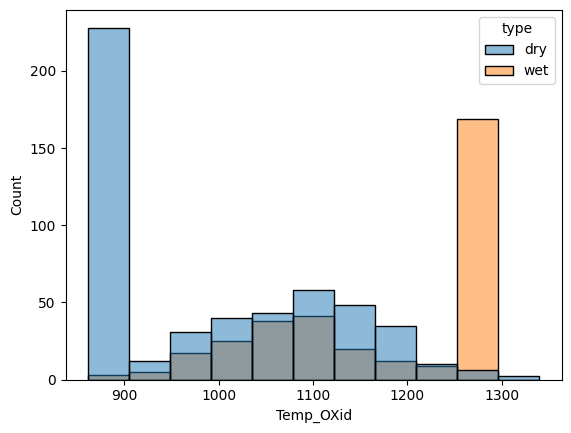

In [86]:
# Check if the temperature difference is due to different type of Oxidation
# Dry type should be around 900, and Wet type should be around 1300

sns.histplot(data=df1_oxid, x='Temp_OXid', hue='type')

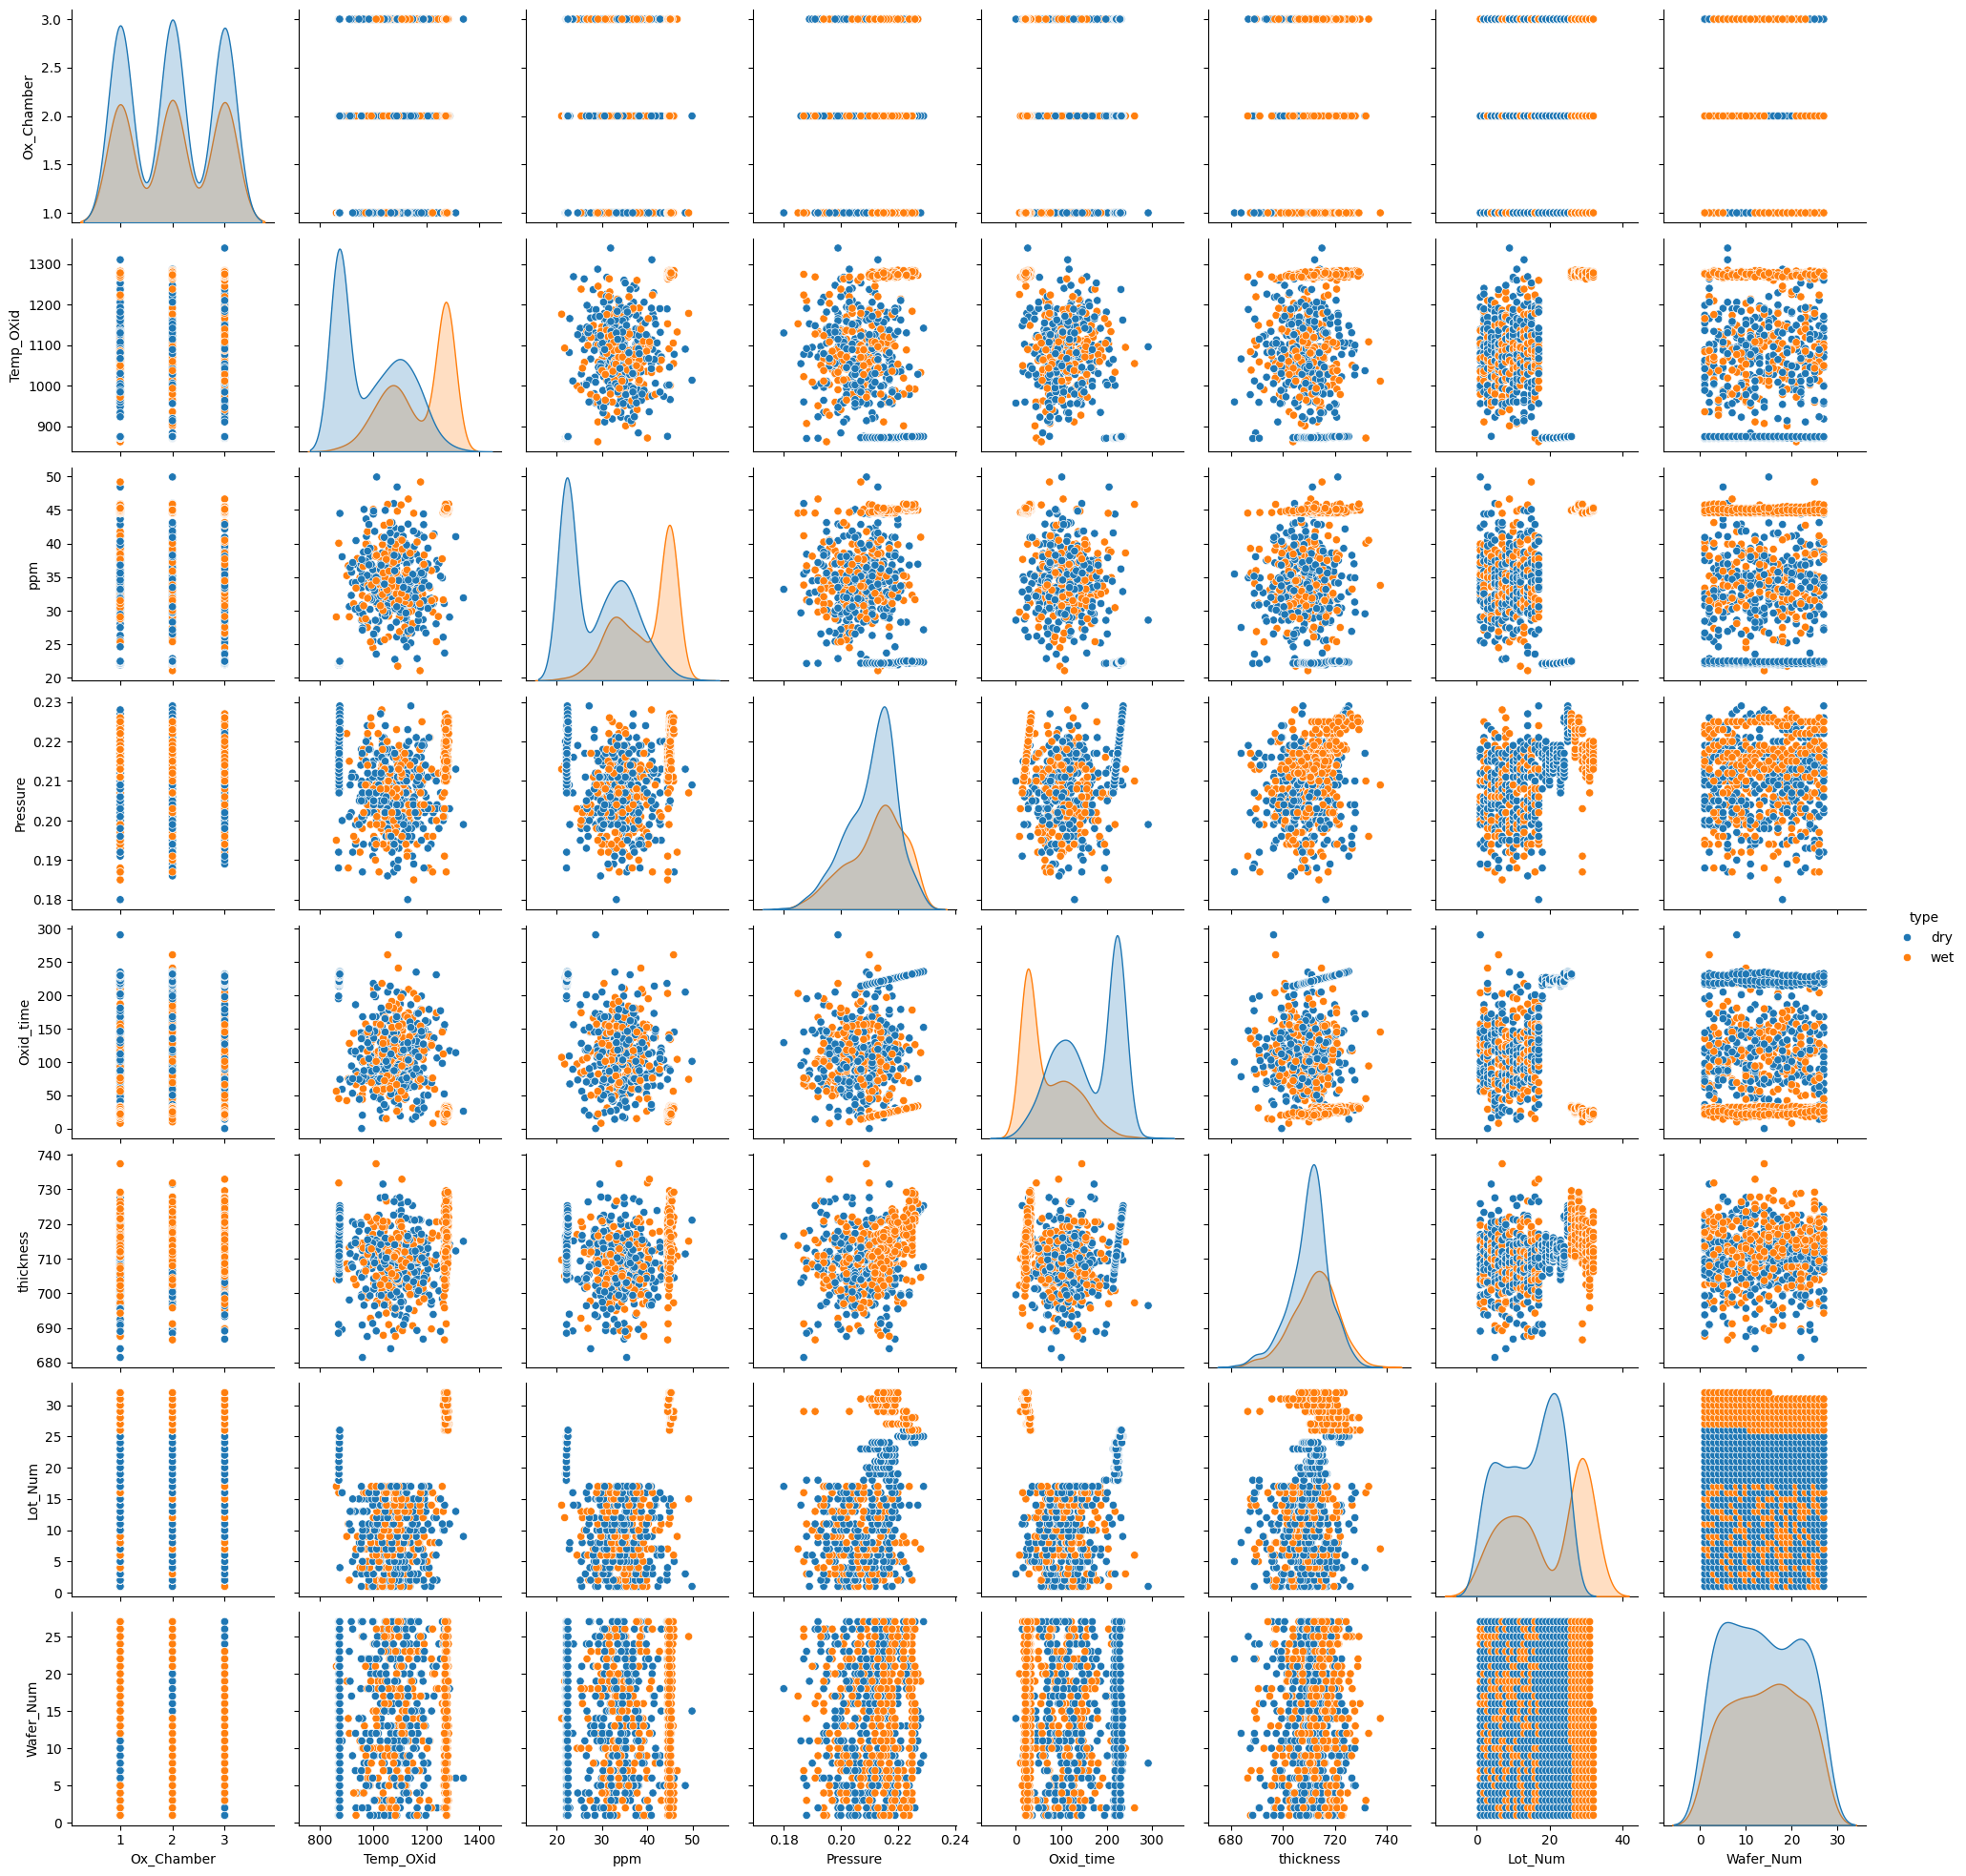

In [87]:
# Based on Oxidation type, features of data shared some similarities and differences

sns.pairplot(data=df1_oxid, hue='type')

In [88]:
# Dry type uses O2, and Wet type uses H2O for Oxidation

print(df1_oxid['type'].value_counts())

type
dry    513
wet    339
Name: count, dtype: int64


In [89]:
print(df1_oxid['Vapor'].value_counts())

Vapor
O2     513
H2O    339
Name: count, dtype: int64


In [90]:
# Investigate the case whtn Oxidation thickness is less than 700nm since the thickness must be at least 700nm after Oxidation process
# There are total 82 cases where oxidation process is defective (resulted thickness is less than 700nm)
# In this case, average oxidation time is way lower and temperature was higher
# It is recommended to make sure the condition of 'True' case to meet the 'False' Condition for less defective process

cond1 = (df1_oxid['thickness'] < 700)
df1_oxid.loc[cond1, 'Reinforcement'] = "True"
df1_oxid.loc[~cond1, 'Reinforcement'] = "False"

print(df1_oxid['Reinforcement'].value_counts())
print('\n')

df1_oxid.pivot_table(index='Reinforcement', values=['Oxid_time', 'ppm', 'Pressure', 'Temp_OXid'])

Reinforcement
False    770
True      82
Name: count, dtype: int64




Oxid_time  Pressure    Temp_OXid        ppm
Reinforcement                                              
False          125.555411  0.211891  1062.494658  33.107623
True           110.037975  0.206524  1082.455629  34.090732

In [91]:
df1_oxid = df1_oxid.dropna()

# Etching Dataset

In [92]:
df1_etch = pd.read_csv('Etching_000.csv')

In [93]:
df1_etch.head(3)

Unnamed: 0  Etching_Chamber Process 3  Temp_Etching  Source_Power  \
0           0                3   Etching        70.878        50.851   
1           1                2   Etching        69.561        52.283   
2           2                1   Etching        70.968        51.610   

   Selectivity    No_Die  Lot_Num  Wafer_Num               Datetime  \
0        1.047  NOLSM111        1          1  17-02-2019 PM 9:04:30   
1        1.051  NOLSM212        1          2  17-02-2019 PM 9:04:30   
2        1.017  NOLSM313        1          3  17-02-2019 PM 9:04:30   

   Thin Film 4  Thin Film 3  Thin Film 2  Thin Film 1  
0        251.0       267.06       303.82       361.38  
1        317.0       332.74       369.31       426.11  
2        411.0       424.21       460.65       517.80

In [94]:
# There is null values across Thin Film features

df1_etch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       852 non-null    int64  
 1   Etching_Chamber  852 non-null    int64  
 2   Process 3        852 non-null    object 
 3   Temp_Etching     852 non-null    float64
 4   Source_Power     852 non-null    float64
 5   Selectivity      852 non-null    float64
 6   No_Die           852 non-null    object 
 7   Lot_Num          852 non-null    int64  
 8   Wafer_Num        852 non-null    int64  
 9   Datetime         852 non-null    object 
 10  Thin Film 4      851 non-null    float64
 11  Thin Film 3      851 non-null    float64
 12  Thin Film 2      851 non-null    float64
 13  Thin Film 1      851 non-null    float64
dtypes: float64(7), int64(4), object(3)
memory usage: 93.3+ KB


In [95]:
# Thin Film 4 and 3 have negative values that must be handled

df1_etch.describe()

Unnamed: 0  Etching_Chamber  Temp_Etching  Source_Power  Selectivity  \
count   852.00000       852.000000    852.000000    852.000000   852.000000   
mean    425.50000         1.967136     71.147822     51.227459     1.032140   
std     246.09551         0.830584      0.824158      0.634215     0.016238   
min       0.00000         1.000000     68.150000     49.342000     0.984000   
25%     212.75000         1.000000     70.709750     50.794500     1.022000   
50%     425.50000         2.000000     71.220500     51.247000     1.033500   
75%     638.25000         3.000000     71.656500     51.698250     1.043000   
max     851.00000         3.000000     73.081000     53.272000     1.076000   

          Lot_Num   Wafer_Num  Thin Film 4  Thin Film 3  Thin Film 2  \
count  852.000000  852.000000   851.000000   851.000000   851.000000   
mean    16.281690   13.894366   296.633373   311.276439   347.799401   
std      9.116841    7.785951   125.378446   125.714630   125.774630   
min      1.000000    1.000000   -49.000000   -34.650000     2.000000   
25%      8.000000    7.000000   202.000000   216.525000   252.880000   
50%     16.000000   14.000000   281.000000   295.970000   332.480000   
75%     24.000000   21.000000   372.000000   386.675000   423.050000   
max     32.000000   27.000000   687.000000   700.240000   736.510000   

       Thin Film 1  
count   851.000000  
mean    404.940012  
std     125.790535  
min      59.380000  
25%     310.185000  
50%     389.630000  
75%     480.355000  
max     793.500000

In [96]:
# Etching film must be thicker than 0 so negative values are not acceptable

cond1 = (df1_etch['Thin Film 4'] < 0)
df1_etch.loc[cond1, 'Thin Film 4'] = np.nan

cond2 = (df1_etch['Thin Film 3'] < 0)
df1_etch.loc[cond2, 'Thin Film 3'] = np.nan

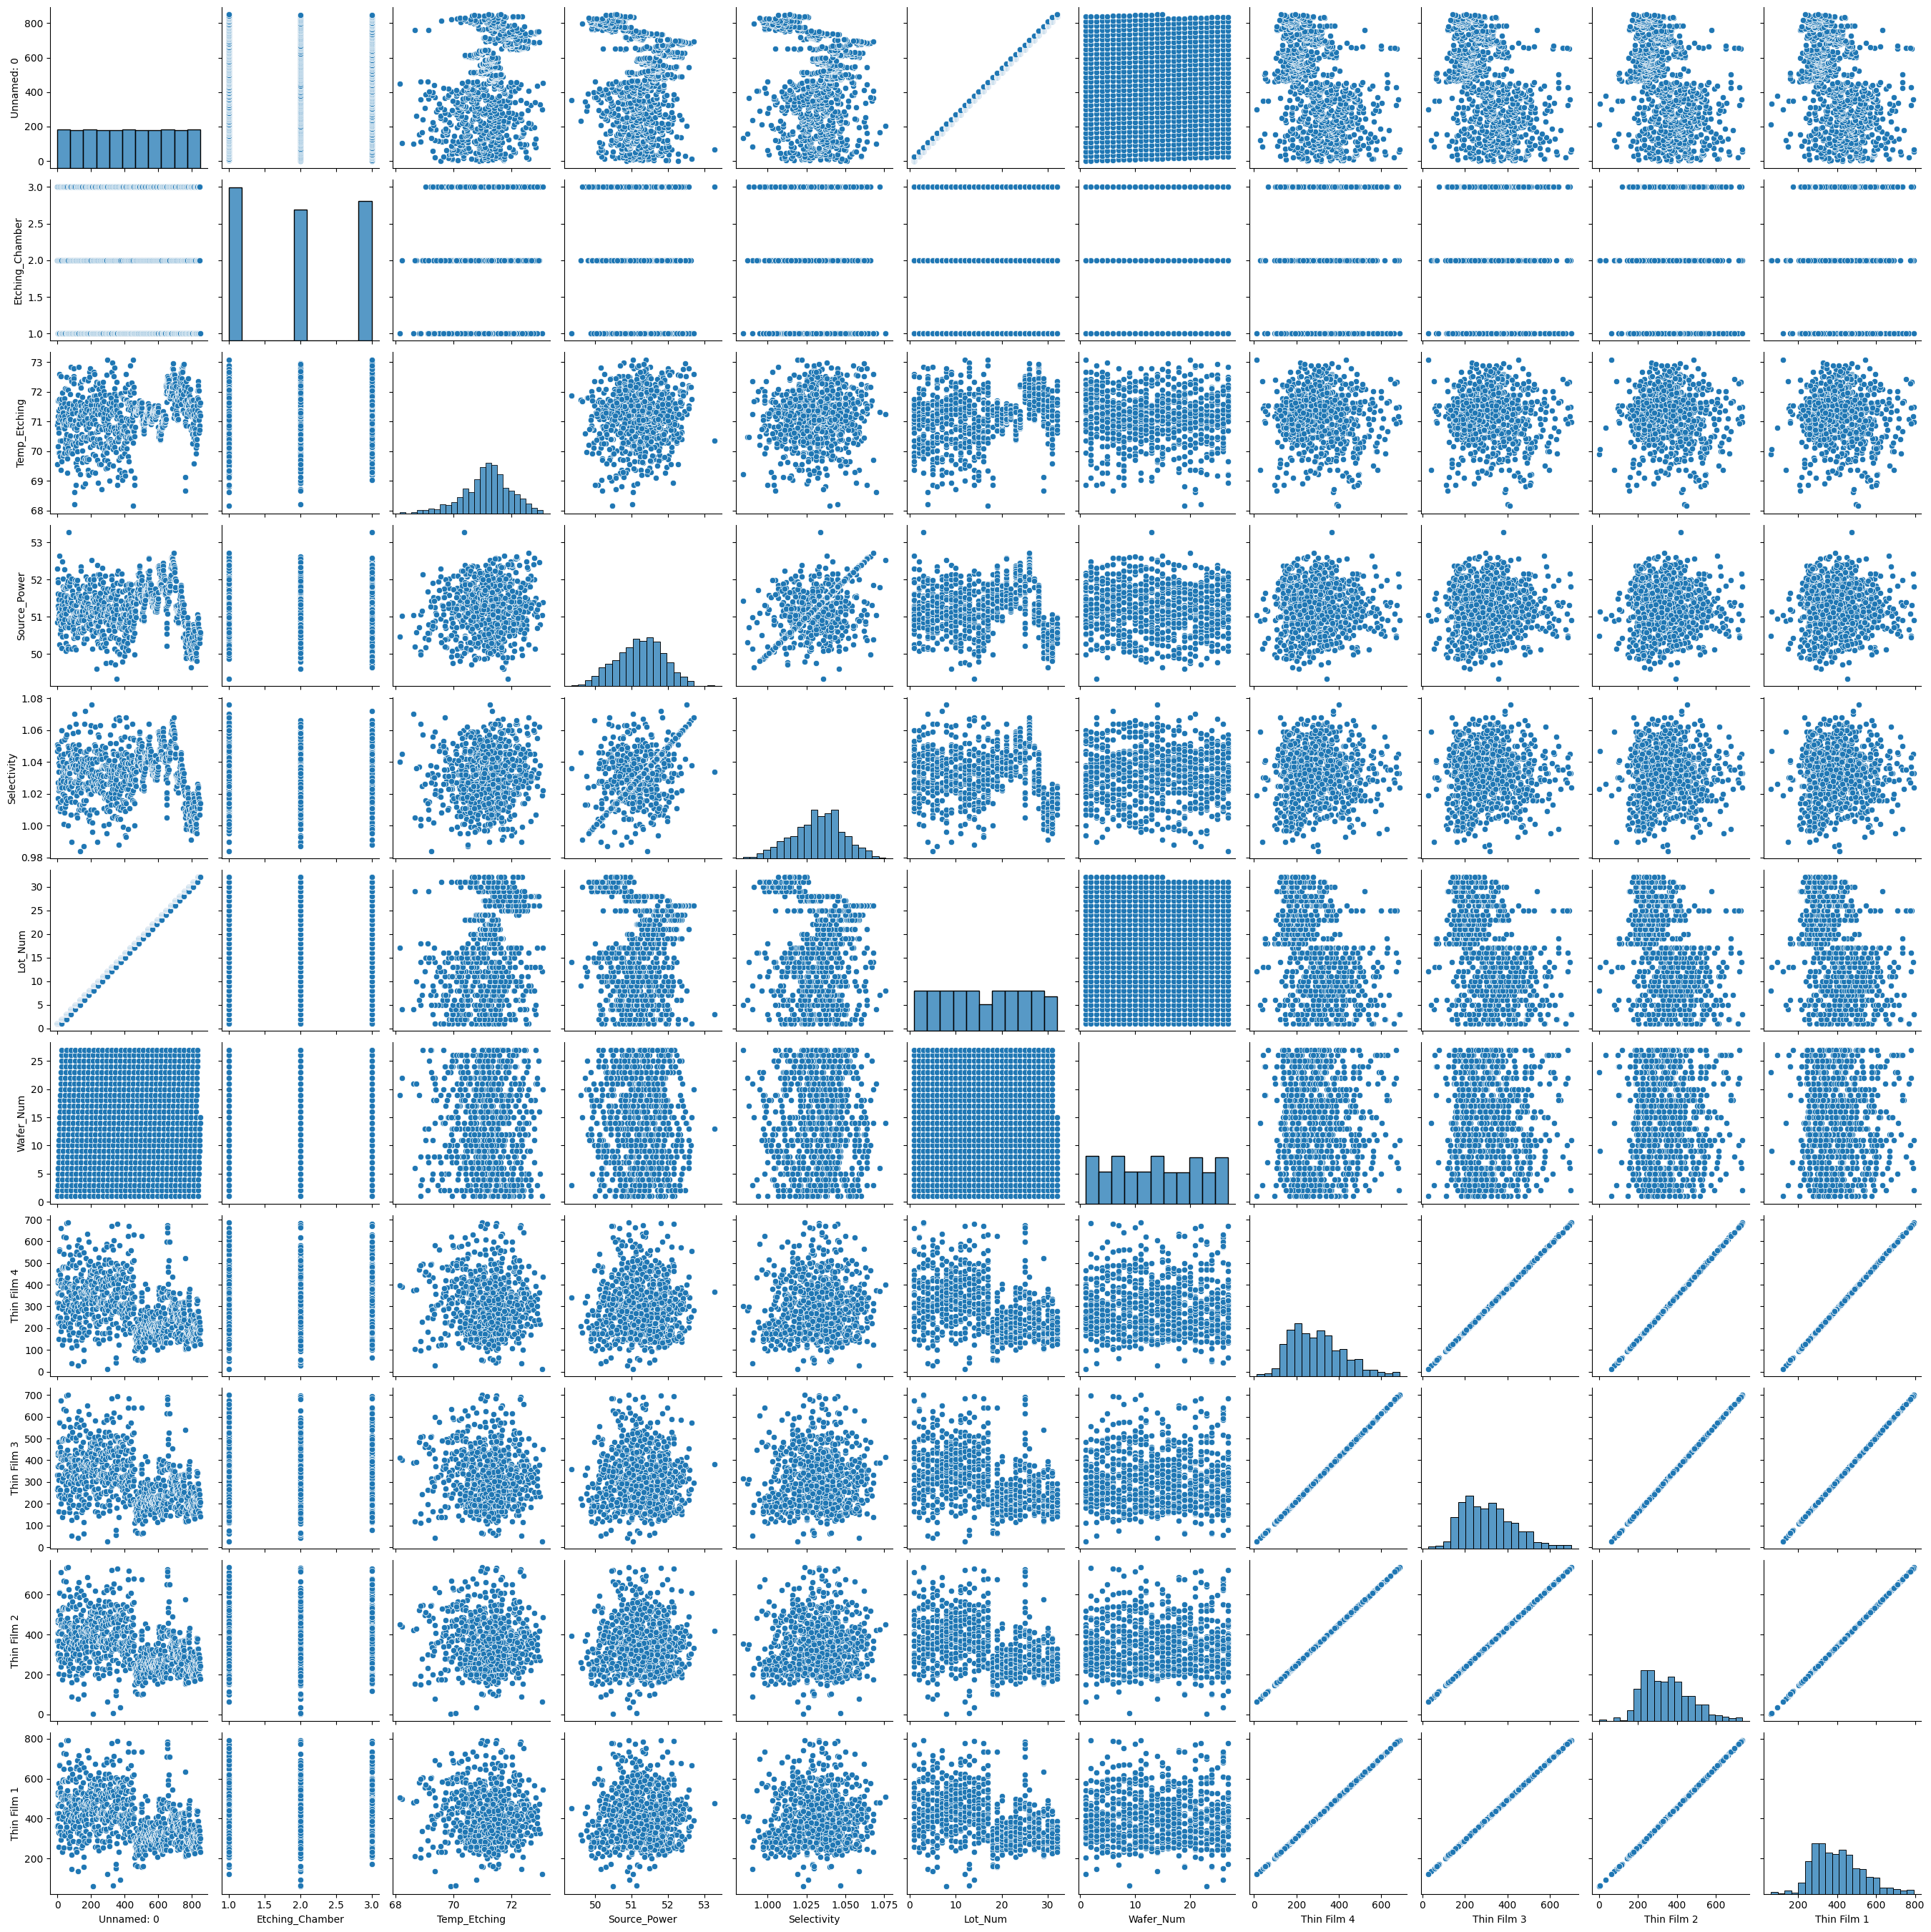

In [97]:
# All the features across the dataset shows normalization

sns.pairplot(data=df1_etch)

In [98]:
df1_etch['etch_rate'] = (df1_etch['Thin Film 1'] - df1_etch['Thin Film 4']) / 40

In [99]:
df1_etch = df1_etch.dropna()

# Ionization Dataset

In [100]:
df1_ion = pd.read_csv('Implant_000.csv')

In [101]:
df1_ion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Chamber_Num        852 non-null    int64  
 1   process4           852 non-null    object 
 2   Flux60s            851 non-null    float64
 3   Flux90s            851 non-null    float64
 4   Flux160s           851 non-null    float64
 5   Flux480s           852 non-null    float64
 6   Flux840s           852 non-null    float64
 7   input_Energy       852 non-null    float64
 8   Current            852 non-null    float64
 9   Temp_implantation  852 non-null    float64
 10  Furance_Temp       851 non-null    float64
 11  RTA_Temp           852 non-null    int64  
 12  No_Die             852 non-null    object 
 13  Lot_Num            852 non-null    int64  
 14  Wafer_Num          852 non-null    int64  
 15  Datetime           852 non-null    object 
dtypes: float64(9), int64(4), o

In [102]:
df1_ion.describe()

Chamber_Num       Flux60s       Flux90s      Flux160s      Flux480s  \
count   852.000000  8.510000e+02  8.510000e+02  8.510000e+02  8.520000e+02   
mean      1.967136  1.186913e+16  7.982876e+16  4.483541e+17  3.002006e+17   
std       0.830584  4.603012e+15  5.478891e+16  3.322530e+17  1.145362e+15   
min       1.000000  1.967326e+15 -4.117940e+16 -6.930960e+16  2.963401e+17   
25%       1.000000  8.590656e+15  3.081442e+16  1.319423e+17  2.994309e+17   
50%       2.000000  1.177267e+16  8.132774e+16  4.571101e+17  3.001862e+17   
75%       3.000000  1.516101e+16  1.209841e+17  6.816896e+17  3.009426e+17   
max       3.000000  2.403938e+16  2.720974e+17  1.401808e+18  3.036145e+17   

           Flux840s  input_Energy       Current  Temp_implantation  \
count  8.520000e+02    852.000000  8.520000e+02         852.000000   
mean   5.999997e+17  32007.862815  1.000000e-02         103.161261   
std    1.080690e+12    588.322496  1.614240e-16           1.654830   
min    5.999965e+17  29604.262000  1.000000e-02          97.744000   
25%    5.999990e+17  31640.161000  1.000000e-02         102.063500   
50%    5.999997e+17  32200.488500  1.000000e-02         103.295500   
75%    6.000004e+17  32420.668750  1.000000e-02         104.322000   
max    6.000025e+17  33675.551000  1.000000e-02         107.376000   

       Furance_Temp    RTA_Temp     Lot_Num   Wafer_Num  
count    851.000000  852.000000  852.000000  852.000000  
mean     901.128085  154.696009   16.281690   13.894366  
std       18.487803    2.420114    9.116841    7.785951  
min      854.000000  148.000000    1.000000    1.000000  
25%      890.000000  153.000000    8.000000    7.000000  
50%      904.000000  155.000000   16.000000   14.000000  
75%      915.000000  156.000000   24.000000   21.000000  
max      944.000000  162.000000   32.000000   27.000000

In [103]:
cond1 = (df1_ion['Flux90s'] < 0)
df1_ion.loc[cond1, 'Flux90s'] = np.nan

cond2 = (df1_ion['Flux160s'] < 0)
df1_ion.loc[cond2, 'Flux160s'] = np.nan

In [104]:
df1_ion = df1_ion.dropna()

# Lithography Dataset

In [105]:
df1_litho = pd.read_csv('Photo_lithography_000.csv')

In [106]:
df1_litho.describe()

lithography_Chamber    Line_CD  Wavelength  Resolution  \
count           852.000000  851.00000  852.000000  851.000000   
mean              2.009390   40.81287  404.427230  516.211377   
std               0.831182   11.80044   28.802021   27.018584   
min               1.000000    4.56200  365.000000  441.717000   
25%               1.000000   31.60500  365.000000  499.569500   
50%               2.000000   40.00300  405.000000  514.981000   
75%               3.000000   49.66700  436.000000  540.054500   
max               3.000000   76.26500  436.000000  582.878000   

       Energy_Exposure     Lot_Num   Wafer_Num  
count       851.000000  852.000000  852.000000  
mean        108.088647   16.281690   13.894366  
std           1.525622    9.116841    7.785951  
min         103.407000    1.000000    1.000000  
25%         107.067000    8.000000    7.000000  
50%         108.251000   16.000000   14.000000  
75%         109.163500   24.000000   21.000000  
max         112.069000   32.000000   27.000000

In [107]:
cond1 = (df1_litho['Line_CD'] < 25)
cond2 = (df1_litho['Line_CD'] > 55)

df1_litho.loc[cond1 | cond2, 'Range_check'] = 'Check'
df1_litho.loc[~(cond1 | cond2), 'Range_check'] = 'normal'

In [108]:
# During Lithography(Photo), comparably lower wavelength, resolution, and energy exposure turned out to be the cause of defective line critical dimension

df1_litho.pivot_table(index='Range_check', values=['Wavelength', 'Resolution', 'Energy_Exposure'])

Energy_Exposure  Resolution  Wavelength
Range_check                                         
Check             107.706484  512.906511  402.177419
normal            108.195538  517.135746  405.055556

# Merging all the dataset for future modeling

In [109]:
df1_soft = pd.read_csv('Photo_Softbake_000.csv')
df1_target = pd.read_csv('Inspect_000.csv')

In [110]:
m1 = pd.merge(df1_oxid, df1_soft, on='No_Die', how='inner', suffixes=('', '_soft'))
m2 = pd.merge(m1, df1_litho, on='No_Die', how='inner', suffixes=('', '_litho'))
m3 = pd.merge(m2, df1_etch, on='No_Die', how='inner', suffixes=('', '_etch'))
m4 = pd.merge(m3, df1_ion, on='No_Die', how='inner', suffixes=('', '_ion'))
m5 = pd.merge(m4, df1_target, on='No_Die', how='inner', suffixes=('', '_target'))

In [111]:
df1 = m5.drop(columns=['Lot_Num_soft', 'Wafer_Num_soft', 'Datetime_soft', 'Lot_Num_litho', 'Wafer_Num_litho', 'Datetime_litho', 'Unnamed: 0_etch',
                 'Lot_Num_etch', 'Wafer_Num_etch', 'Datetime_etch', 'Lot_Num_ion', 'Wafer_Num_ion', 'Datetime_ion',
                 'Lot_Num_target', 'Wafer_Num_target', 'Datetime_target'])

In [112]:
# Overall Chamber route column

df1['Chamber_route'] = 'route' + df1['Ox_Chamber'].astype(str) + df1['photo_soft_Chamber'].astype(str) + df1['lithography_Chamber'].astype(str) +\
df1['Etching_Chamber'].astype(str) + df1['Chamber_Num'].astype(str)

In [113]:
# Final Preprocessed dataset merged 5 individual process data

preprocessing = pd.read_csv('preprocessing_data.csv')

In [114]:
preprocessing.shape

(752, 60)

<Axes: xlabel='Target', ylabel='Count'>

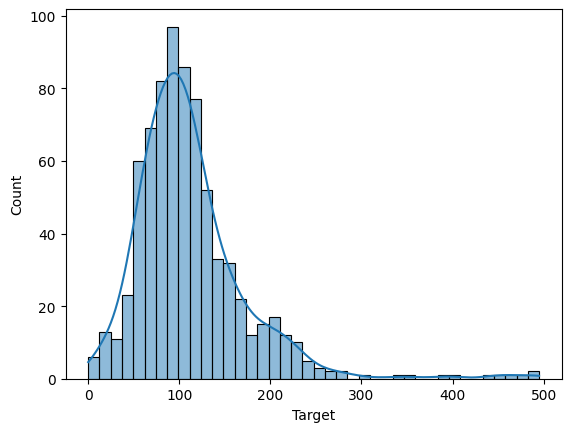

In [115]:
# Distribution of defective chip count in a wafer (This case a single wafer has 2000 Die)

sns.histplot(data=preprocessing, x='Target', kde=True)

In [116]:
df2 = preprocessing[['thickness', 'Line_CD', 'Etching_rate', 'Target']]

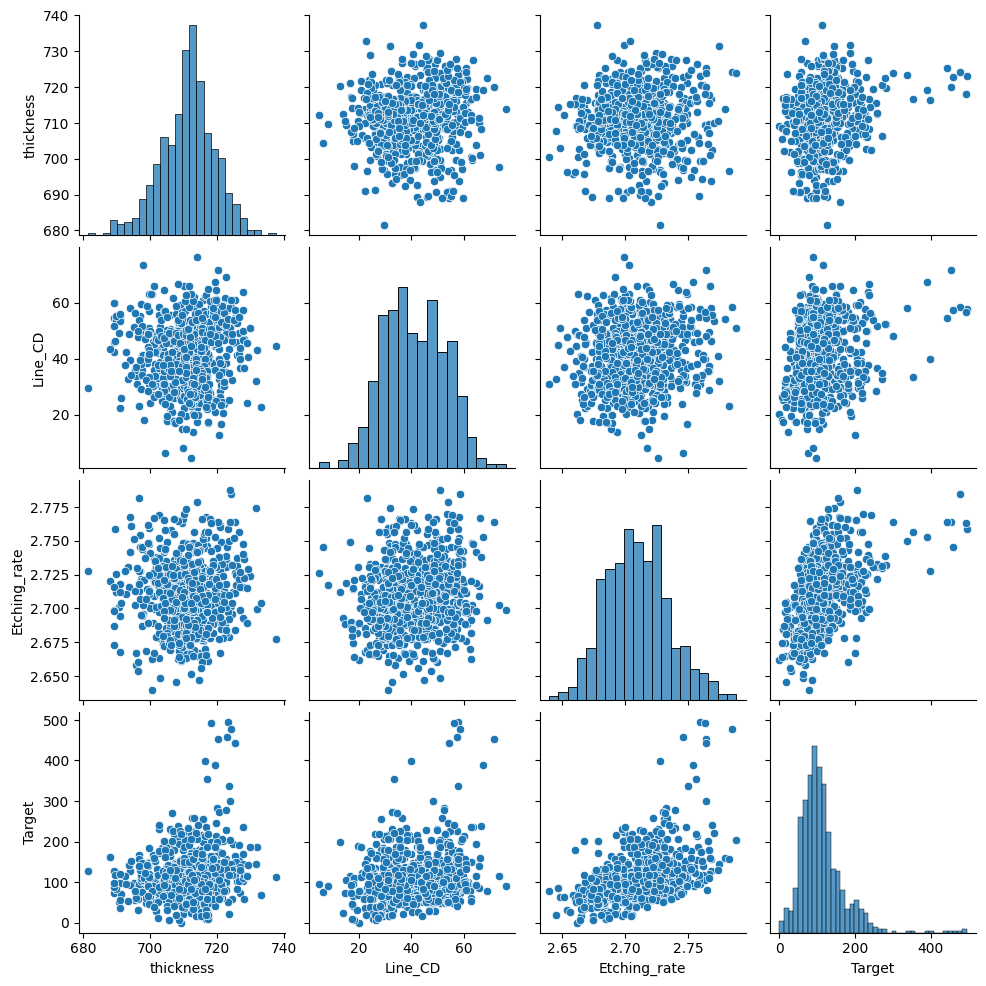

In [117]:
sns.pairplot(data=df2)

<Axes: xlabel='count', ylabel='Error_message'>

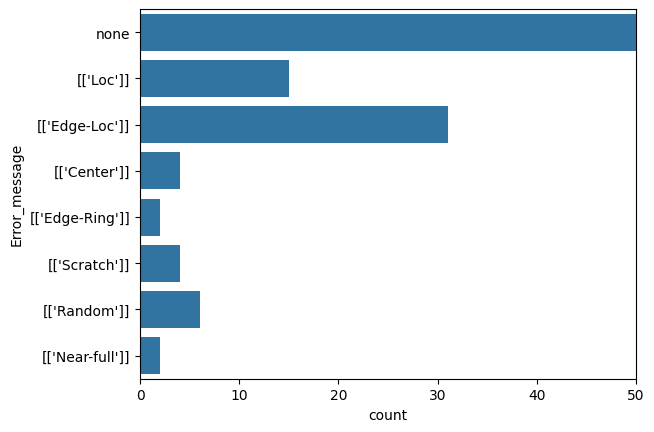

In [118]:
plt.xlim(0,50)

sns.countplot(data=preprocessing, y='Error_message')

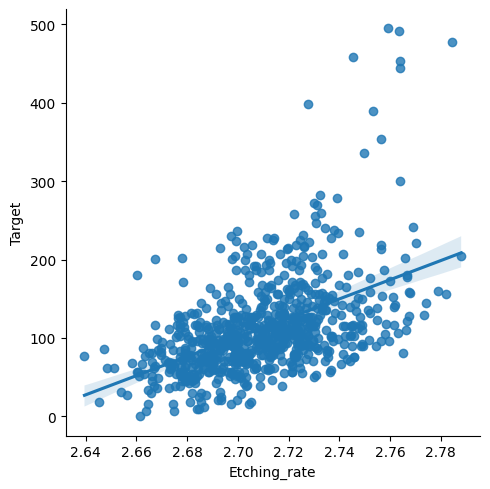

In [119]:
# The number of defect chips are positively correlated with Etching rate

df2 = preprocessing[['Etching_rate', 'Target']]
sns.lmplot(data=df2, x='Etching_rate', y='Target')

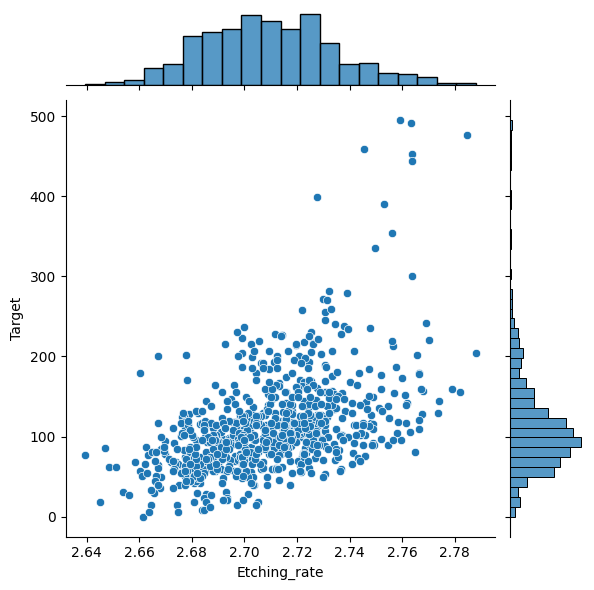

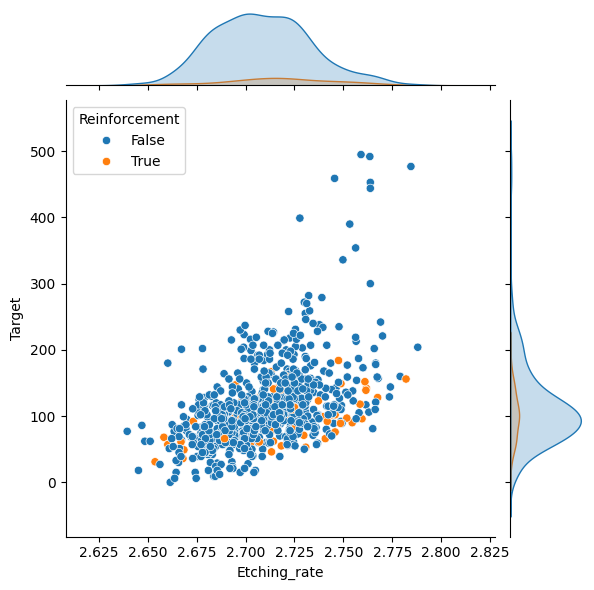

In [120]:
sns.jointplot(data=df2, x='Etching_rate', y='Target')
sns.jointplot(data=preprocessing, x='Etching_rate', y='Target', hue='Reinforcement')

<Axes: xlabel='UV_type', ylabel='count'>

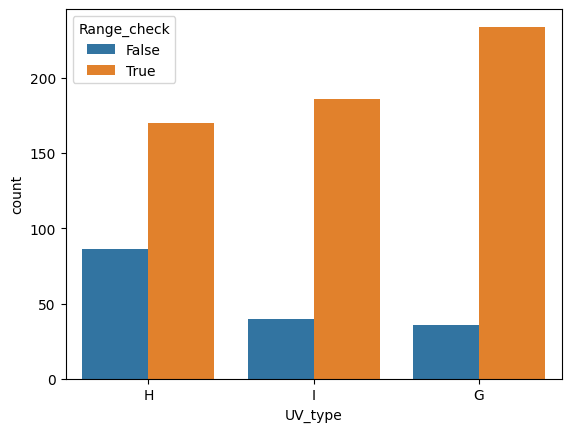

In [121]:
# Photo defect check per UV_type
# There was huge number of wafers that fell outside of a proper Line CD when UV_type was H

sns.countplot(data=preprocessing, x='UV_type', hue='Range_check')

In [122]:
preprocessing['count'] = 1

<ipython-input-123-6e99e97fdfc7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1_chamber_route_sorting, y='Chamber_Route', x='count', palette='Set2')


Text(0.5, 1.0, 'Wafer Count per Unique Route')

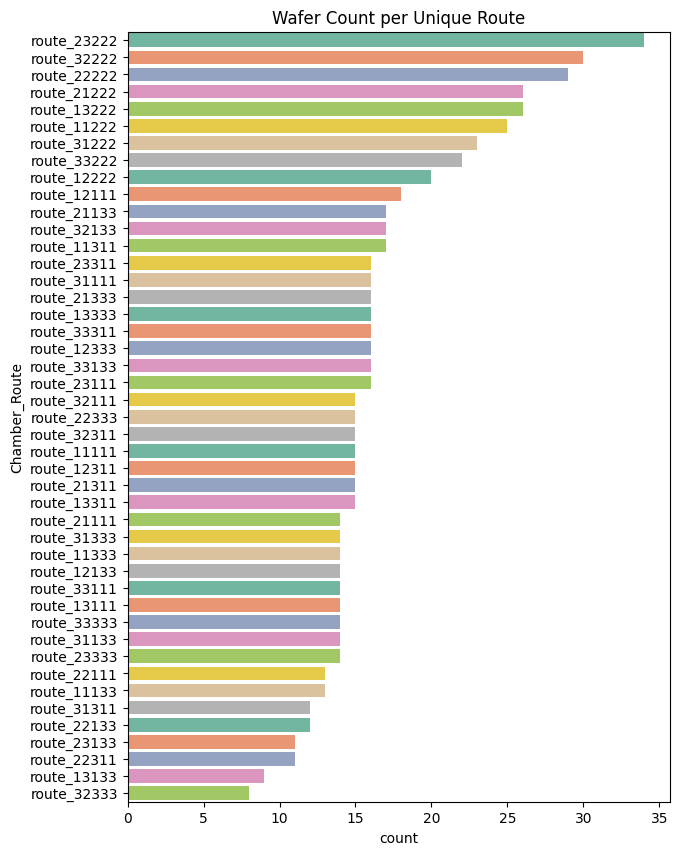

In [123]:
# We can see that which chamber route has been overused that might cause defective dies in the manufacturing process

df1_chamber_route = preprocessing.pivot_table(index='Chamber_Route', values='count', aggfunc='sum').reset_index()
df1_chamber_route_sorting = df1_chamber_route.sort_values(by='count', ascending=False)

plt.figure(figsize=(7,10))
sns.barplot(data=df1_chamber_route_sorting, y='Chamber_Route', x='count', palette='Set2')
plt.title('Wafer Count per Unique Route')

In [124]:
df1_Chamber_error = preprocessing.pivot_table(index='Chamber_Route', values=['Target', 'count'], aggfunc='sum').reset_index()

In [125]:
df1_Chamber_error['error_rate'] = df1_Chamber_error['Target'] / df1_Chamber_error['count']
df1_Chamber_sorting = df1_Chamber_error.sort_values(by='error_rate', ascending=False)

<ipython-input-126-bf7432026d29>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df1_Chamber_sorting, y='Chamber_Route', x='error_rate', palette='Set2')


<Axes: xlabel='error_rate', ylabel='Chamber_Route'>

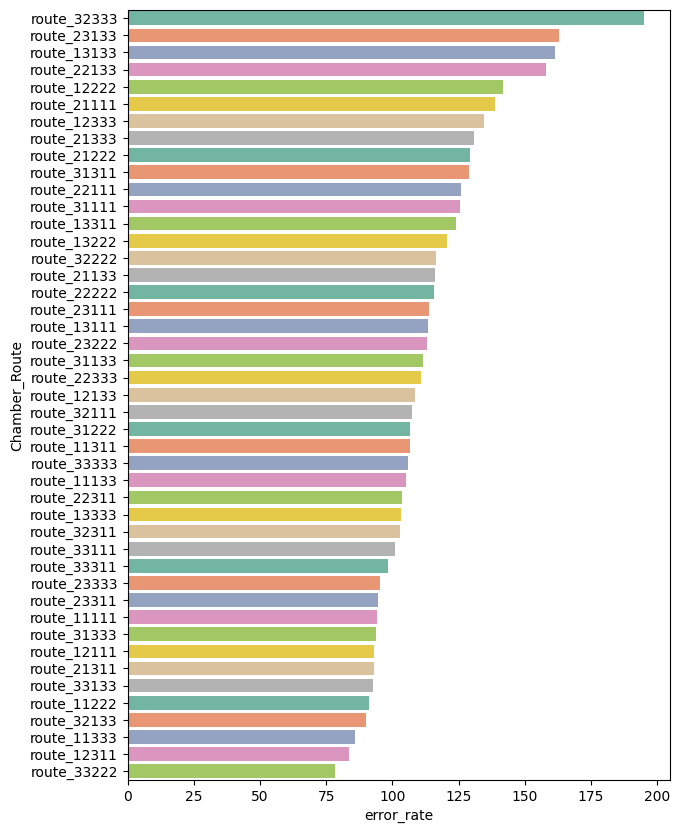

In [126]:
# Percentage of defective die per unique chamber route when a single wafer is produced
# Wafer went through Route 3-2-3-3-3 resulted in almost 200 defective dies in a single wafer


df1_Chamber_error['error_rate'] = df1_Chamber_error['Target'] / df1_Chamber_error['count']
df1_Chamber_sorting = df1_Chamber_error.sort_values(by='error_rate', ascending=False)

plt.figure(figsize=(7,10))
sns.barplot(data= df1_Chamber_sorting, y='Chamber_Route', x='error_rate', palette='Set2')

# Machine Learning Modeling

In [127]:
# Forecast the Probability of Defect during the future process

df1 = pd.read_csv('preprocessing_data.csv')

In [128]:
df1.head(3)

Unnamed: 0  Ox_Chamber    process type    Temp_OXid Vapor    ppm  Pressure  \
0           0           1  Oxidation  dry  1138.979159    O2  32.80     0.200   
1           1           1  Oxidation  dry  1218.184551    O2  31.86     0.194   
2           2           1  Oxidation  dry  1062.467808    O2  39.51     0.217   

   Oxid_time  thickness  ...      Flux480s      Flux840s  input_Energy  \
0       62.0    699.443  ...  3.002593e+17  6.000007e+17     31574.410   
1      137.0    696.792  ...  3.017903e+17  6.000012e+17     31580.213   
2      128.0    705.471  ...  2.994231e+17  6.000002e+17     32162.414   

   Temp_implantation Furance_Temp  RTA_Temp  Target  Error_message  \
0            102.847        885.0       154      96           none   
1            104.323        919.0       154     102           none   
2            100.605        916.0       155      95           none   

   target_binom  Chamber_Route  
0           0.0    route_11133  
1           0.0    route_11222  
2           0.0    route_11311  

[3 rows x 60 columns]

In [129]:
df1.columns

Index(['Unnamed: 0', 'Ox_Chamber', 'process', 'type', 'Temp_OXid', 'Vapor',
       'ppm', 'Pressure', 'Oxid_time', 'thickness', 'No_Die', 'Reinforcement',
       'Unnamed: 0_x', 'photo_soft_Chamber', 'process 2', 'resist_target',
       'N2_HMDS', 'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake',
       'time_HMDS_bake', 'spin1', 'spin2', 'spin3', 'photoresist_bake',
       'temp_softbake', 'time_softbake', 'lithography_Chamber', 'Line_CD',
       'UV_type', 'Wavelength', 'Resolution', 'Energy_Exposure', 'Range_check',
       'Unnamed: 0_y', 'Etching_Chamber', 'Process 3', 'Temp_Etching',
       'Source_Power', 'Selectivity', 'Thin Film 4', 'Thin Film 3',
       'Thin Film 2', 'Thin Film 1', 'Etching_rate', 'Chamber_Num', 'process4',
       'Flux60s', 'Flux90s', 'Flux160s', 'Flux480s', 'Flux840s',
       'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp',
       'Target', 'Error_message', 'target_binom', 'Chamber_Route'],
      dtype='object')

In [130]:
# There are 688 wafer that is okay to go to next stage, but 64 defective wafers that have to be scrapped

df1['target_binom'].value_counts()

target_binom
0.0    688
1.0     64
Name: count, dtype: int64

In [136]:
# Model will learn based on features included in the X

Y = df1['target_binom']
X = df1[['Oxid_time', 'Pressure', 'time_softbake', 'thickness', 'resist_target', 'Line_CD', 'Etching_rate', 'input_Energy', 'Temp_implantation']]

In [137]:
X

Oxid_time  Pressure  time_softbake  thickness  resist_target  Line_CD  \
0         62.0     0.200         30.009    699.443       1.211940   30.959   
1        137.0     0.194         29.997    696.792       0.887720   29.653   
2        128.0     0.217         30.005    705.471       1.113156   28.063   
3         90.0     0.201         29.997    710.772       0.882195   31.556   
4         98.0     0.204         30.001    716.975       0.834001   31.969   
..         ...       ...            ...        ...            ...      ...   
747       21.0     0.214         30.005    708.586       0.923802   35.404   
748       22.0     0.215         29.990    712.936       0.837348   31.011   
749       21.0     0.214         29.996    715.498       0.859869   32.525   
750       22.0     0.215         29.994    707.179       0.914315   28.001   
751       22.0     0.215         30.006    716.238       0.938200   30.007   

     Etching_rate  input_Energy  Temp_implantation  
0         2.75950     31574.410            102.847  
1         2.72775     31580.213            104.323  
2         2.67000     32162.414            100.605  
3         2.74825     32874.925            101.739  
4         2.74625     30985.928            106.422  
..            ...           ...                ...  
747       2.67450     32252.961            101.177  
748       2.72725     32253.818            100.736  
749       2.72275     32248.621            101.503  
750       2.69150     32241.426            101.061  
751       2.70525     32258.401            101.439  

[752 rows x 9 columns]

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Simple Decision Classifier Algorithm

In [139]:
# Obviously the model is overfitted since we have unbalanced dataset

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
accuracy_score(Y_train, Y_train_pred)

1.0

In [140]:
Y_test_pred = model.predict(X_test)
accuracy_score(Y_test, Y_test_pred)

0.8672566371681416

In [141]:
from sklearn.metrics import classification_report

print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       483
         1.0       1.00      1.00      1.00        43

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526



In [142]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       205
         1.0       0.30      0.33      0.32        21

    accuracy                           0.87       226
   macro avg       0.62      0.63      0.62       226
weighted avg       0.87      0.87      0.87       226



In [143]:
# Feature Engineering (Cross Validation, Imputing, Scailing, Grid-Search)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

pipe_list = [('impute', SimpleImputer()), ('scaler', MinMaxScaler()), ('model', DecisionTreeClassifier())]
pipe_model = Pipeline(pipe_list)

grid_model = GridSearchCV(
    pipe_model,
    cv=3,n_jobs=-1,
    param_grid={
        'model__max_depth': range(5, 10),
        'model__min_samples_leaf': range(5, 10),
        'model__class_weight': ['balanced', None]
    },
    scoring='f1'
)

grid_model.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('impute', SimpleImputer()),
                                       ('scaler', MinMaxScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': ['balanced', None],
                         'model__max_depth': range(5, 10),
                         'model__min_samples_leaf': range(5, 10)},
             scoring='f1')

In [144]:
best_model = grid_model.best_estimator_

In [145]:
# Regular Decision Tree model shows better performance than feature-engienered / tuned model

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       483
         1.0       0.73      0.44      0.55        43

    accuracy                           0.94       526
   macro avg       0.84      0.71      0.76       526
weighted avg       0.93      0.94      0.93       526

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       205
         1.0       0.36      0.19      0.25        21

    accuracy                           0.89       226
   macro avg       0.64      0.58      0.60       226
weighted avg       0.87      0.89      0.88       226



## Bagging (Random Forest) and Boosting (Gradient Boosting)

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [147]:
model_sampler = SMOTE()
model_sampler.fit(X_train, Y_train)

SMOTE()

In [148]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import numpy as np

pipe_list = [
    ('impute', SimpleImputer()),
    ('over_sample', SMOTE(sampling_strategy=0.8, k_neighbors=5)),
    ('model', GradientBoostingClassifier())
]

pipe_model = Pipeline(pipe_list)

hyper_parameter = {
    'model__n_estimators': [100, 150, 200],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_leaf': [2, 3],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.8, 0.9],
    'model__validation_fraction': [0.1, 0.2],
    'model__n_iter_no_change': [5, 10]
}

randomized_model = RandomizedSearchCV(
    pipe_model,
    param_distributions=hyper_parameter,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    scoring='f1',
    verbose=1,
    random_state=42
)

randomized_model.fit(X_train, Y_train)
best_model = randomized_model.best_estimator_

print(f"Best Model: {best_model}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Model: Pipeline(steps=[('impute', SimpleImputer()),
                ('over_sample', SMOTE(sampling_strategy=0.8)),
                ('model',
                 GradientBoostingClassifier(max_depth=5, min_samples_leaf=3,
                                            n_estimators=200,
                                            n_iter_no_change=10,
                                            subsample=0.9))])


In [149]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       483
         1.0       0.95      0.98      0.97        43

    accuracy                           0.99       526
   macro avg       0.98      0.99      0.98       526
weighted avg       0.99      0.99      0.99       526

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       205
         1.0       0.50      0.38      0.43        21

    accuracy                           0.91       226
   macro avg       0.72      0.67      0.69       226
weighted avg       0.90      0.91      0.90       226



In [150]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

pipe_list = [
    ('impute', SimpleImputer()),
    ('over_sample', SMOTE(sampling_strategy=0.8, k_neighbors=5)),
    ('model', RandomForestClassifier(class_weight='balanced'))
]

pipe_model = Pipeline(pipe_list)

hyper_parameter = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': range(5, 15),
    'model__min_samples_leaf': range(1, 5),
    'model__min_samples_split': range(2, 10),
    'model__max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    pipe_model,
    param_distributions=hyper_parameter,
    n_iter=10,  # 시도할 하이퍼파라미터 조합 수
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1,
    scoring='f1'
)

random_search.fit(X_train, Y_train)
best_model = random_search.best_estimator_


In [151]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       483
         1.0       1.00      1.00      1.00        43

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       205
         1.0       0.55      0.29      0.38        21

    accuracy                           0.91       226
   macro avg       0.74      0.63      0.66       226
weighted avg       0.89      0.91      0.90       226

